In [1]:
import pandas as pd
import numpy as np 
import seaborn as sb 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")

In [2]:
!pip install seaborn

In [3]:
df=pd.read_csv(r"D:\mlproject\notebook\student.csv")

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
print(f"categories in gender feature:",end=" ")
print(df["gender"].unique())
print("categories in race ethnicity feature :",end=" ")
print(df["race_ethnicity"].unique())
print("categories in parental level of education feature :",end=" ")
print(df["parental_level_of_education"].unique())
print("categories in lunch feature :",end=" ")
print(df["lunch"].unique())
print("categories in test prediction course feature :",end=" ")
print(df["test_preparation_course"].unique(),len(df["test_preparation_course"].unique()))

categories in gender feature: ['female' 'male']
categories in race ethnicity feature : ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental level of education feature : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch feature : ['standard' 'free/reduced']
categories in test prediction course feature : ['none' 'completed'] 2


In [10]:
numerical_feature=[feature  for feature  in df.columns if df[feature].dtype!="object"]
print("these are  the numerical feature:",numerical_feature)
categorical_feature=[feature for feature in df.columns if df[feature].dtype=="object" ]
print("these are the categorical feature:",categorical_feature)

these are  the numerical feature: ['math_score', 'reading_score', 'writing_score']
these are the categorical feature: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [11]:
df["total score"]=df["math_score"]+df["reading_score"]+df["writing_score"]
df["average score"]=df["total score"]/3

In [12]:
df.head(1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


In [13]:
maths_full_marks=df[df["math_score"]==100] ["average score"].count()
print(f" students get full marks in maths: {maths_full_marks}")

writing_full_marks=df[df["writing_score"]==100]["average score"].count()
print(f"these many students  get full marks in writing :{writing_full_marks}")

reading_full_marks=df[df["reading_score"]==100]["average score"].count()
print(f"these many students get full marks in reading :{reading_full_marks}")

 students get full marks in maths: 7
these many students  get full marks in writing :14
these many students get full marks in reading :17


In [14]:
less_than_20_marks_in_maths=df[df["math_score"]<20]["average score"].count()
print(f"students get less than 20 marks in maths :{less_than_20_marks_in_maths}")
less_than_20_marks_in_reading=df[df["reading_score"]<20]["average score"].count()
print(f"these many students get less than 20 marks in reading :{less_than_20_marks_in_reading}")
less_than_20_marks_in_writing=df[df["writing_score"]<20]["average score"].count()
print(f"these many students get less than 20 marks in writing :{less_than_20_marks_in_writing}")

students get less than 20 marks in maths :4
these many students get less than 20 marks in reading :1
these many students get less than 20 marks in writing :3


<Axes: xlabel='average score', ylabel='Count'>

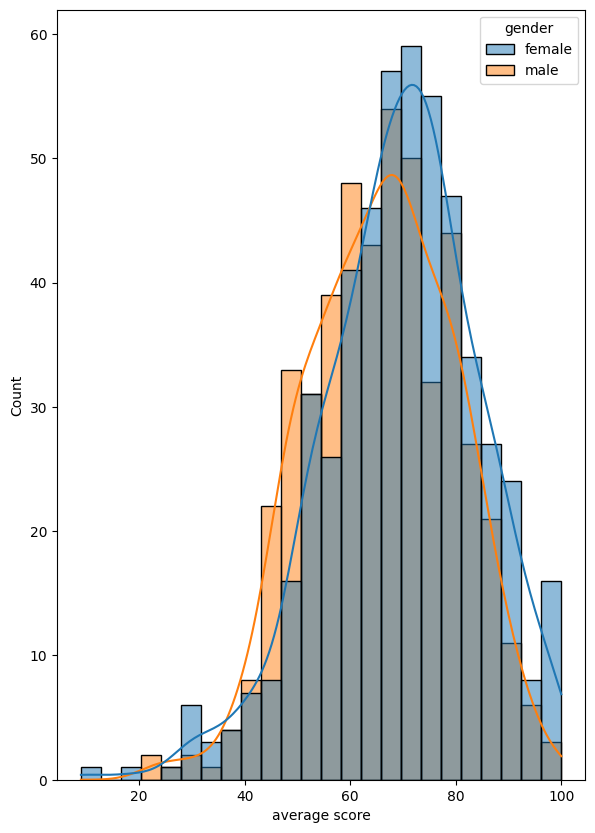

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(1 ,2, 1 )
sb.histplot(data=df,x="average score",kde=True,hue="gender")

In [26]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='average score', ylabel='Count'>

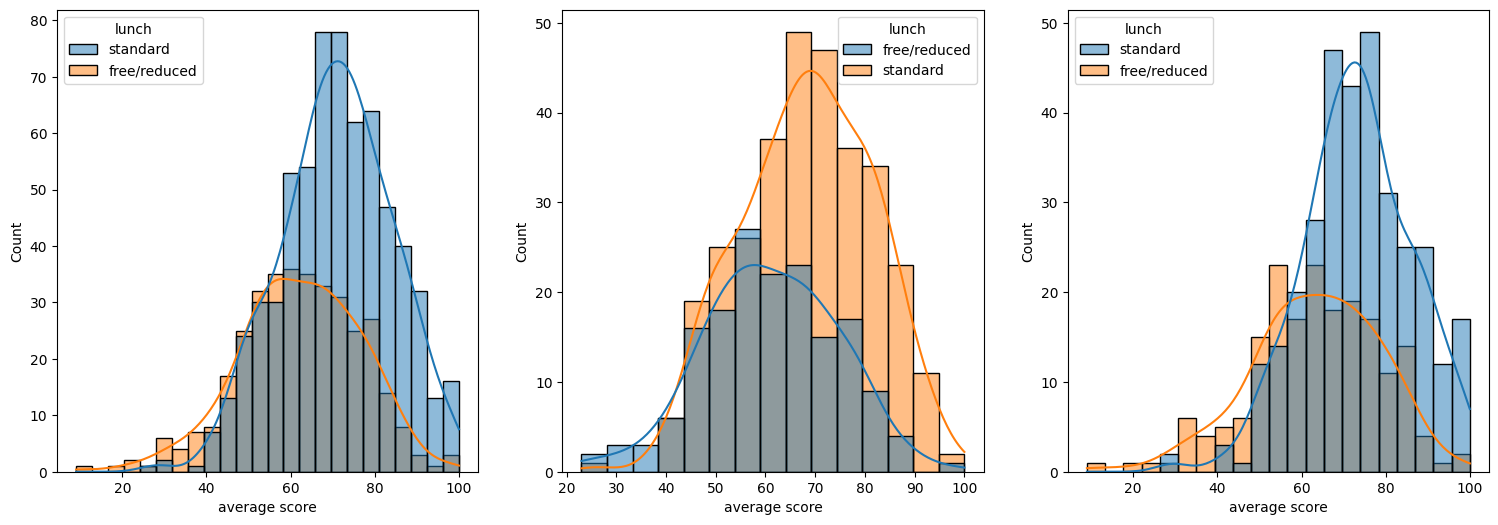

In [32]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,4,1)
sb.histplot(data=df,x="average score",kde=True,hue="lunch")
plt.subplot(1,4,2)
sb.histplot(data=df[df.gender=="male"],x="average score",kde=True,hue="lunch")
plt.subplot(1,4,3)
sb.histplot(data=df[df.gender=="female"],x="average score",kde=True,hue="lunch")

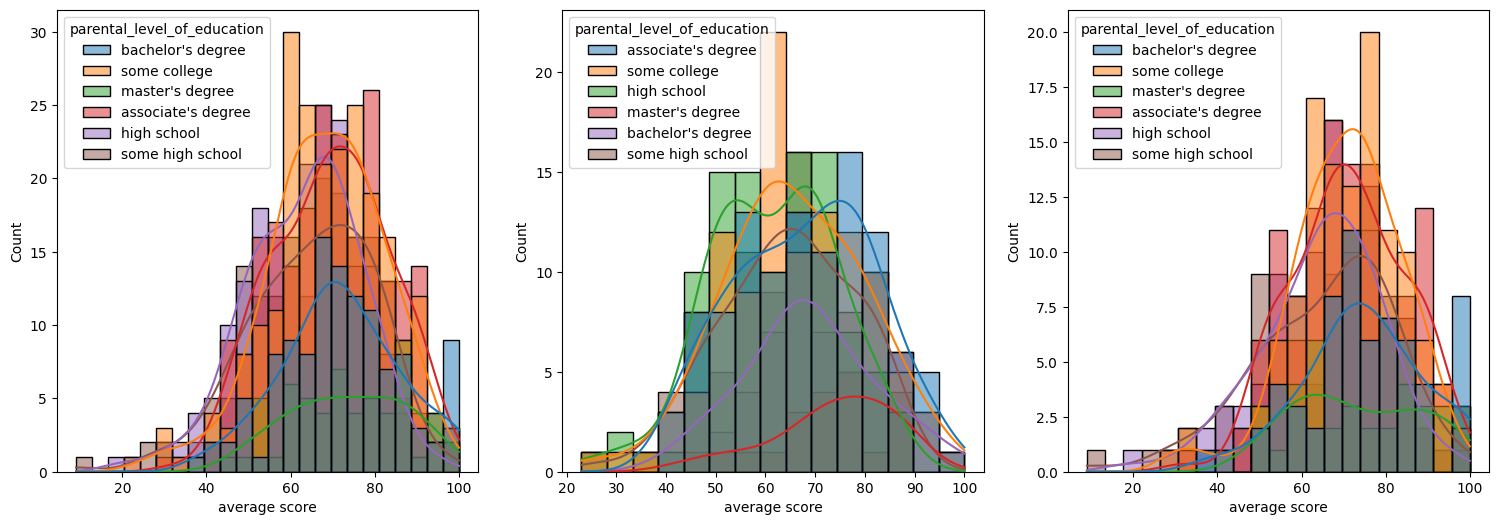

In [45]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sb.histplot(data=df,x='average score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sb.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sb.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='parental_level_of_education')
plt.show()

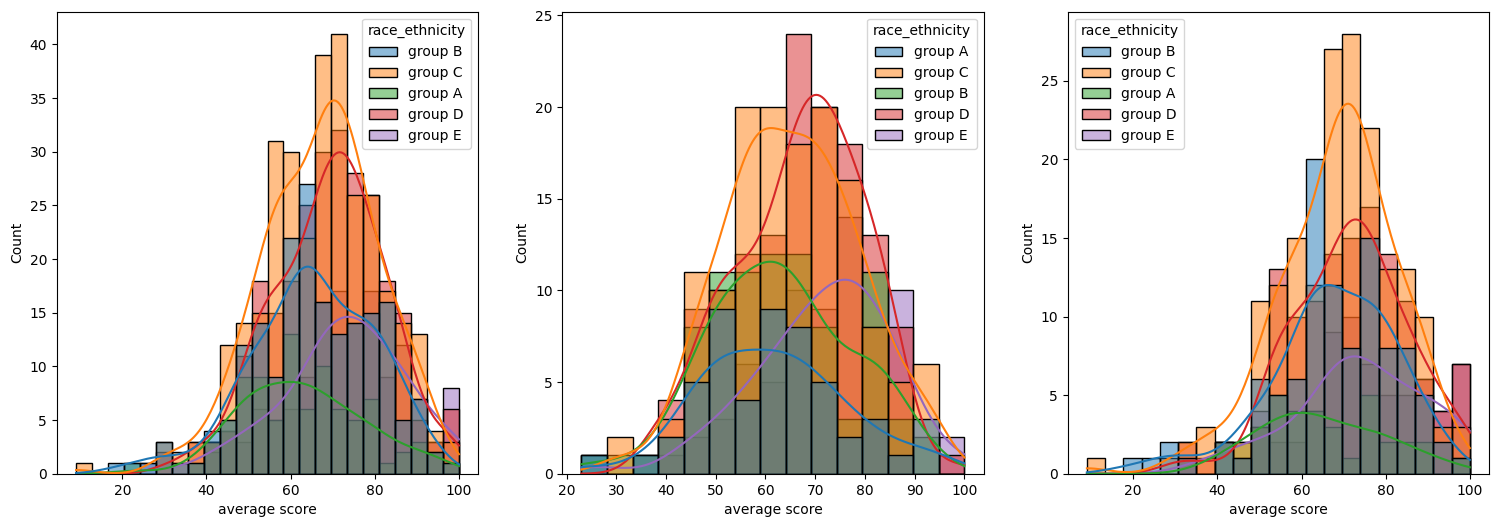

In [54]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,4,1)
ax=sb.histplot(data=df,x="average score",kde=True,hue="race_ethnicity")
plt.subplot(1,4,2)
ax=sb.histplot(data=df[df.gender=="male"],x="average score",hue="race_ethnicity",kde=True)
plt.subplot(1,4,3)
ax=sb.histplot(data=df[df.gender=="female"],x="average score",hue="race_ethnicity",kde=True)

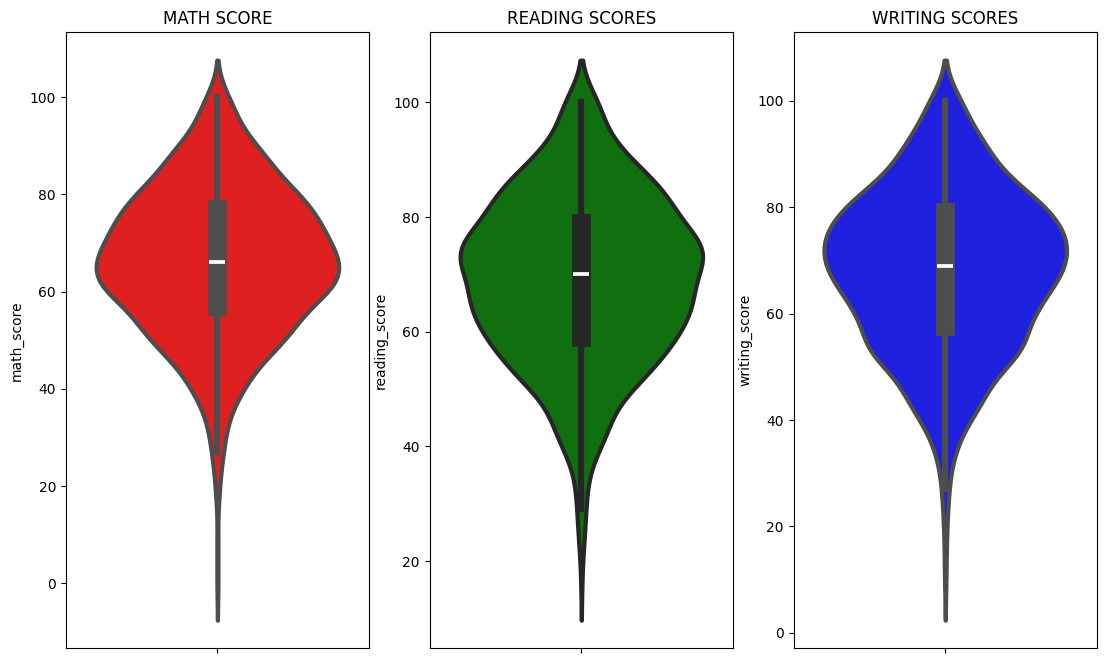

In [57]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORE')
sb.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sb.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sb.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

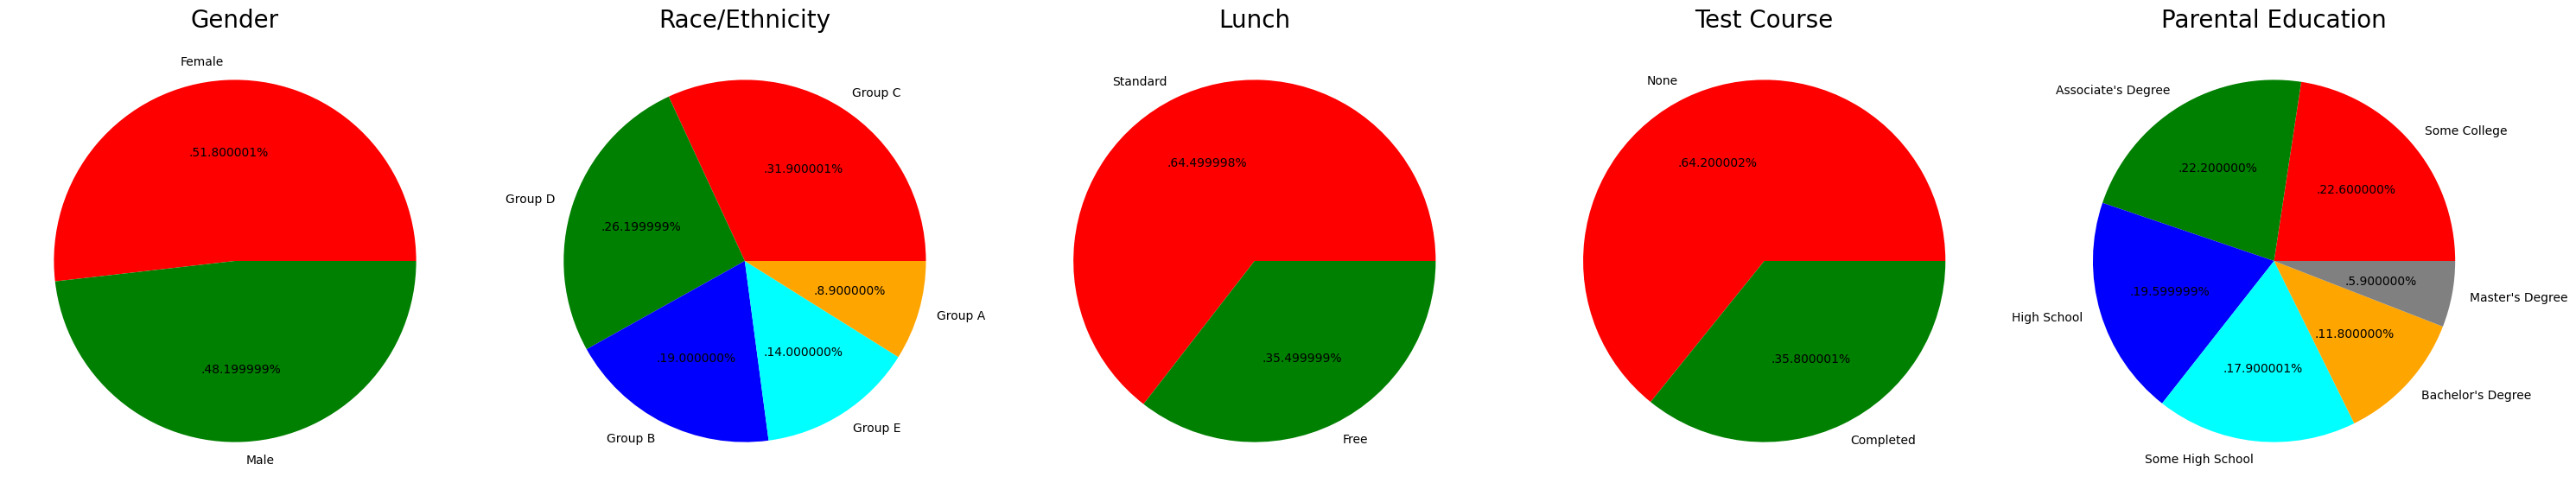

In [61]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()